In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.0/715.0 kB 11.3 MB/s eta 0:00:00a 0:00:01


In [2]:
import ultralytics

from ultralytics import YOLO
import os
from PIL import Image
import cv2
from IPython.display import Video
import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


ultralytics.checks()

Ultralytics YOLOv8.1.14 🚀 Python-3.10.13 torch-2.1.2+cpu CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5432.1/8062.4 GB disk)


In [3]:
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 50.5MB/s]


In [4]:
Root_dir = '/kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces'

In [5]:
yaml_path = os.path.join(Root_dir, 'data.yaml.yaml')
train_path = os.path.join(Root_dir, 'train', 'images')
valid_path = os.path.join(Root_dir, 'valid', 'images')

In [6]:
results = model.train(
    data=yaml_path,
    epochs=15,
    batch=32,
    lr0=0.0001, 
    lrf=0.1,
    imgsz=640,
    plots= True
)

Ultralytics YOLOv8.1.14 🚀 Python-3.10.13 torch-2.1.2+cpu CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/data.yaml.yaml, epochs=15, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

100%|██████████| 755k/755k [00:00<00:00, 4.64MB/s]
2024-02-15 07:00:50,172	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-15 07:00:51,227	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-15 07:00:54.314698: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 07:00:54.314870: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 07:00:54.478060: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

train: Scanning /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/train/labels... 606 images, 0 backgrounds, 0 corrupt: 100%|██████████| 606/606 [00:03<00:00, 167.24it/s]

train: WARNING ⚠️ /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.0fe973299ff9e73874d9e684cba4e406.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.5e1a9d49ad09f5a7549225a05e1f66a6.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.bb226be189ee3a6399fbbd5080852e5b.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/valid/labels... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<00:00, 174.96it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15         0G      1.701      3.498      1.318        328        640: 100%|██████████| 19/19 [14:35<00:00, 46.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.900s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:29<00:00, 29.08s/it]

                   all         58        386      0.235      0.254      0.181      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15         0G      1.247      1.365      1.093        464        640: 100%|██████████| 19/19 [14:14<00:00, 44.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 4.900s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:30<00:00, 30.60s/it]

                   all         58        386      0.903      0.832      0.937      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15         0G      1.146     0.8667      1.036        541        640: 100%|██████████| 19/19 [14:14<00:00, 44.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:28<00:00, 28.23s/it]

                   all         58        386      0.937      0.943      0.982      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15         0G      1.137     0.7749       1.03        513        640: 100%|██████████| 19/19 [14:18<00:00, 45.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:26<00:00, 26.24s/it]

                   all         58        386      0.917      0.946      0.985      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15         0G       1.12     0.7232      1.027        504        640: 100%|██████████| 19/19 [14:20<00:00, 45.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:26<00:00, 26.06s/it]

                   all         58        386      0.958      0.974      0.984      0.735


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15         0G      1.053      0.643      1.046        312        640: 100%|██████████| 19/19 [14:05<00:00, 44.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:25<00:00, 25.07s/it]

                   all         58        386      0.954       0.95      0.982      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15         0G      1.099     0.6343      1.057        334        640: 100%|██████████| 19/19 [14:06<00:00, 44.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:26<00:00, 26.72s/it]

                   all         58        386      0.976       0.98      0.987      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15         0G     0.9948     0.5695      1.018        296        640: 100%|██████████| 19/19 [13:49<00:00, 43.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:41<00:00, 41.30s/it]

                   all         58        386      0.965      0.965      0.983      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15         0G     0.9835     0.5353       1.01        292        640: 100%|██████████| 19/19 [13:40<00:00, 43.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:27<00:00, 27.24s/it]

                   all         58        386      0.976      0.972      0.987      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15         0G      0.935     0.5003     0.9915        282        640: 100%|██████████| 19/19 [13:22<00:00, 42.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:24<00:00, 24.76s/it]

                   all         58        386       0.98      0.983      0.988      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15         0G     0.9221     0.4795      0.985        294        640: 100%|██████████| 19/19 [13:37<00:00, 43.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:25<00:00, 25.20s/it]

                   all         58        386      0.973      0.988      0.986      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15         0G     0.9241     0.4759     0.9912        337        640: 100%|██████████| 19/19 [14:08<00:00, 44.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:24<00:00, 24.63s/it]

                   all         58        386      0.955      0.986      0.989      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15         0G      0.902     0.4538     0.9927        306        640: 100%|██████████| 19/19 [13:49<00:00, 43.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:26<00:00, 26.39s/it]

                   all         58        386      0.968      0.986      0.987      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15         0G     0.8823     0.4456     0.9799        256        640: 100%|██████████| 19/19 [13:33<00:00, 42.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:36<00:00, 36.11s/it]

                   all         58        386      0.971      0.985      0.987      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15         0G     0.8671     0.4299     0.9666        348        640: 100%|██████████| 19/19 [13:46<00:00, 43.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:25<00:00, 25.80s/it]

                   all         58        386      0.974      0.987      0.984      0.774



15 epochs completed in 3.622 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.14 🚀 Python-3.10.13 torch-2.1.2+cpu CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11130615 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:23<00:00, 23.56s/it]


                   all         58        386       0.98      0.983      0.988      0.783
          black-bishop         58         22      0.991      0.955      0.982      0.675
            black-king         58         29          1      0.981      0.995      0.842
          black-knight         58         30      0.999          1      0.995      0.846
            black-pawn         58         77      0.998          1      0.995      0.783
           black-queen         58         11      0.914          1      0.995      0.811
            black-rook         58         28      0.999          1      0.995       0.72
          white-bishop         58         22      0.923          1      0.969      0.744
            white-king         58         29      0.995          1      0.995      0.835
          white-knight         58         19      0.946          1      0.972      0.779
            white-pawn         58         77          1      0.986      0.995      0.778
           white-quee


image 1/1 /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/test/7a34d8620235048917b28bcfd3b5572b_jpg.rf.450c577e3be66b5232c54ffc9ec9e6b7.jpg: 640x640 2 black-rooks, 340.9ms
Speed: 3.4ms preprocess, 340.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


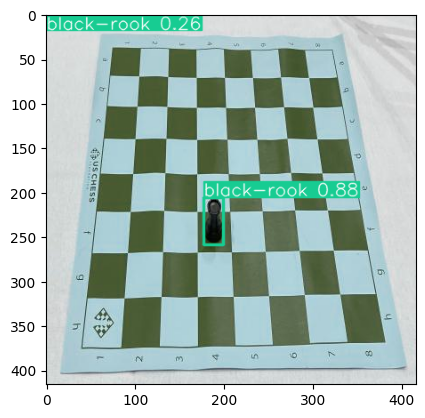

In [7]:
image_test_path = '/kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/test/7a34d8620235048917b28bcfd3b5572b_jpg.rf.450c577e3be66b5232c54ffc9ec9e6b7.jpg'

results = model.predict(source=image_test_path, 
                        imgsz=640)

test_image = results[0].plot(line_width=2)
plt.imshow(test_image)